**Examen Ai Lab School - ["Stroke Predict"](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)**

The following links are a guide to me about some of the important topics to solve this problem:


- [Classification with Deep Learning](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/)

- [The kaggle guide to this problem](https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5/notebook)

- [Classification with Machine Learning](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

- [Interpretation Classification Report - Sklearn](https://www.statology.org/sklearn-classification-report/)

**Introduction**

In this notebook I'll try to predict if a person may have a stroke depending on his/her characteristis or medical information from this [dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

Here is how the notebook is structured:
* First look at Data.
  * Upload the data.
  * Libraries.
  * Missing Values.
* Data Exploration.
  * Numerical Features.
  * Categorical Features.
* Data Preprocess.
  * Label Encoding.
    * Categorical Encoder.
    * One Hot Encoder.
  * Imbalance Data - ML Models.
    * No treatment
    * SMOTE.
    * NearMiss.
  * Imbalance Data - DL Model.
    * No treatment
    * SMOTE.
    * NearMiss.
* Model
  * ML Model
  * DL Model

#First Look at Data

## Upload the Dataset-File (Colab) and Info

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
file_data = "/content/drive/MyDrive/Colab Notebooks/Ai Lab School/Machine_Learning/stroke_data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Attribute Information**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

## Libraries

In [178]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Imbalanced Data
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


#
from sklearn.model_selection import train_test_split

# Metrics and Performance
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
#!pip install pywaffle

## Read and Information

In [ ]:
df = pd.read_csv(file_data)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##Missing Values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_nm = df.copy()

In [ ]:
mean_bmi = df_nm["bmi"].mean() 
df_nm["bmi"].fillna(mean_bmi,inplace=True)

In [ ]:
df_nm.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Data Exploration

In [ ]:
stroke_data = df_nm.copy()
stroke_data = stroke_data.drop('id', axis=1)

stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Numerical Data

In [ ]:
numeric_features = []
for features in stroke_data.columns.difference(['heart_disease','hypertension','stroke']):
    t = str(stroke_data[features].dtype)
    if "int" in t or "float" in t:
        numeric_features.append(features)

numeric_features

['age', 'avg_glucose_level', 'bmi']

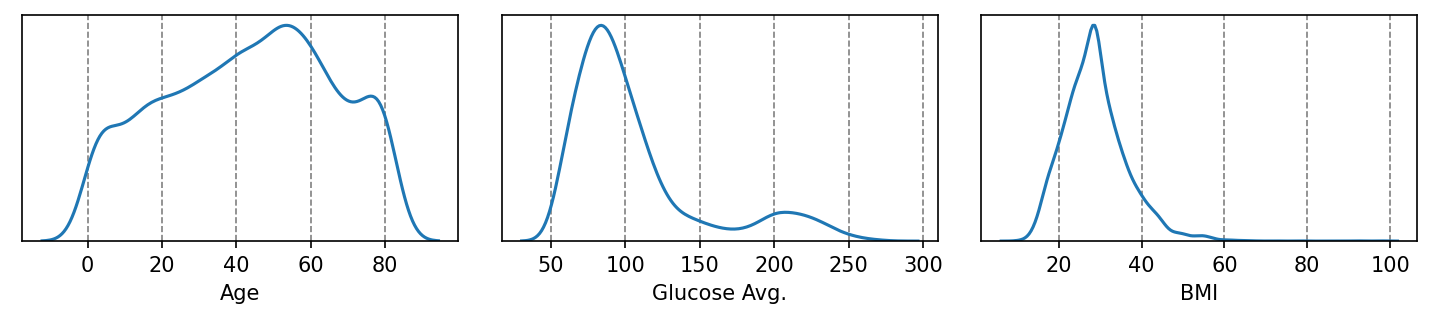

In [ ]:
fig = plt.figure(figsize=(12, 2), dpi=150)
sub = fig.add_gridspec(1, 3)
sub.update(wspace=0.1, hspace=0.4)
titles_plots = ['Age', 'Glucose Avg.', 'BMI']

for i in range(len(numeric_features)):
  num_dist = fig.add_subplot(sub[0, i])
  num_dist.get_yaxis().set_visible(False)
  num_dist.set_xlabel(titles_plots[i])
  num_dist.grid(axis='x', color='gray', linestyle='--')
  sns.kdeplot(data=stroke_data, x=numeric_features[i])

plt.show()

**Observation**: The data shows how our numerical data is distributed. Now I am going to compare this data with strokes and no strokes.

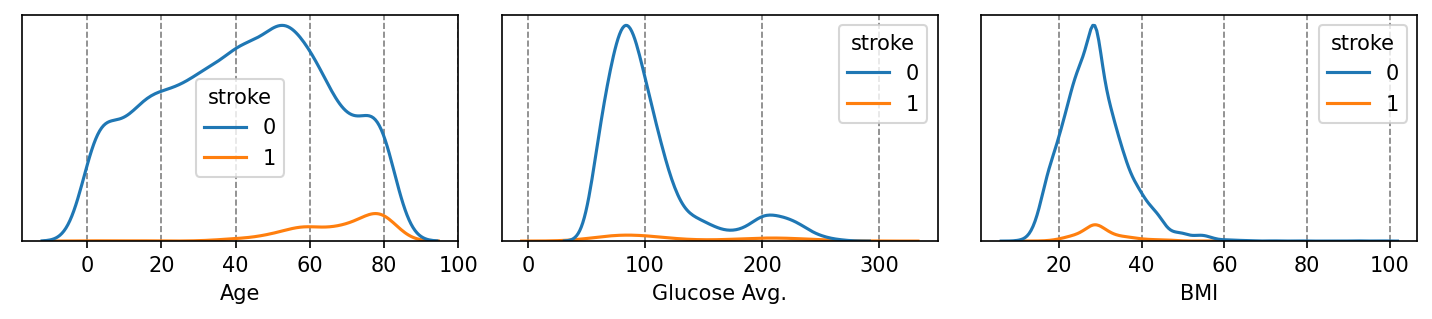

In [ ]:
fig = plt.figure(figsize=(12, 2), dpi=150)
sub = fig.add_gridspec(1, 3)
sub.update(wspace=0.1, hspace=0.4)
titles_plots = ['Age', 'Glucose Avg.', 'BMI']

for i in range(len(numeric_features)):
  num_dist = fig.add_subplot(sub[0, i])
  num_dist.get_yaxis().set_visible(False)
  num_dist.set_xlabel(titles_plots[i])
  num_dist.grid(axis='x', color='gray', linestyle='--')
  sns.kdeplot(data=stroke_data, x=numeric_features[i], hue='stroke')

plt.show()

**Note**: Here we can see that just a minory of the dataset has ever had a stroke (1, orange). This is important to know because the dataset is imbalance and can get me wrong predictions. I read the following link about the imbalanced data: 

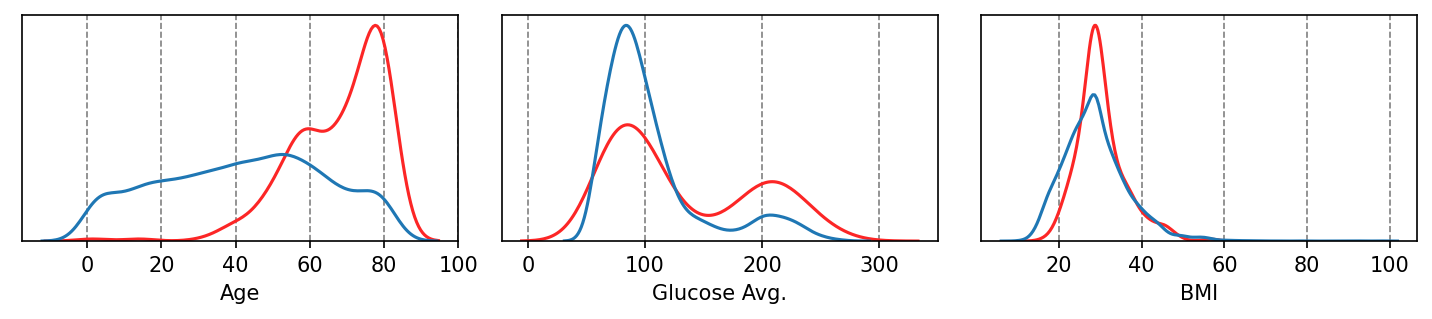

In [ ]:
fig = plt.figure(figsize=(12, 2), dpi=150)
sub = fig.add_gridspec(1, 3)
sub.update(wspace=0.1, hspace=0.4)
titles_plots = ['Age', 'Glucose Avg.', 'BMI']

for i in range(len(numeric_features)):
  num_dist = fig.add_subplot(sub[0, i])
  num_dist.get_yaxis().set_visible(False)
  num_dist.set_xlabel(titles_plots[i])
  num_dist.grid(axis='x', color='gray', linestyle='--')
  sns.kdeplot(data=stroke_data[stroke_data['stroke'] == 1], x=numeric_features[i], color='#FC2626')
  sns.kdeplot(data=stroke_data[stroke_data['stroke'] == 0], x=numeric_features[i])

plt.show()

**Observation**: Now that I plotted the age against the people having or not an stroke, it is clear that age has a strong corelation with strokes.

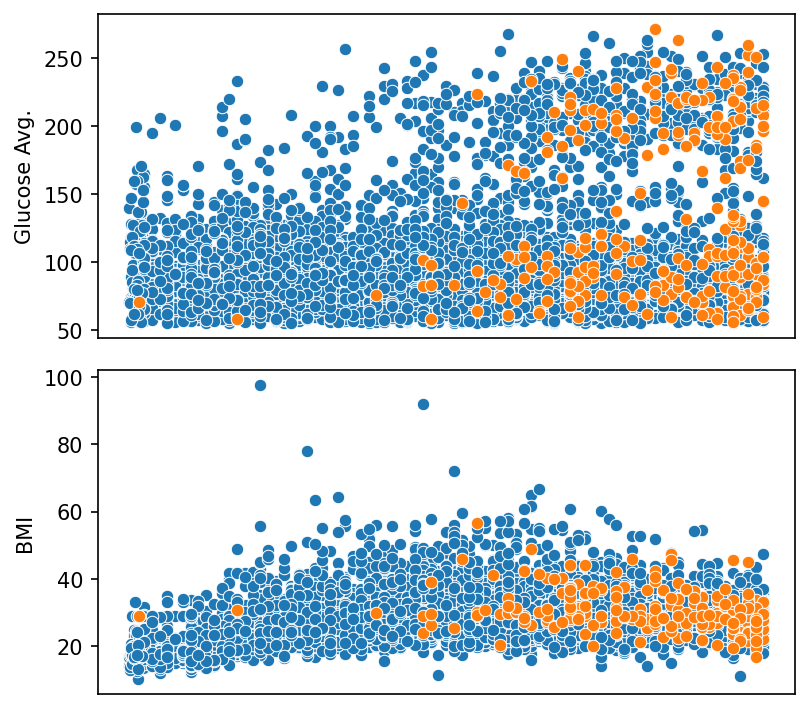

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=150)
sub = fig.add_gridspec(2, 1)
sub.update(wspace=0.1, hspace=0.1)
titles_plots = ['Glucose Avg.', 'BMI']

for i in range(len(titles_plots)):

  num_dist_age = fig.add_subplot(sub[i, 0])
  num_dist_age.get_xaxis().set_visible(False)
  num_dist_age.set_ylabel(titles_plots[i])
  num_dist.grid(axis='x', color='gray', linestyle=':')
  sns.scatterplot(data=stroke_data[stroke_data['stroke'] == 0], x="age", y=numeric_features[i+1])
  sns.scatterplot(data=stroke_data[stroke_data['stroke'] == 1], x="age", y=numeric_features[i+1])

plt.show()

**Observation**: I remark the importance about the age with having a stroke. 

## Categorical Data

In order to analyze the categorical data I might divide every feature in two large groups.

- Strokes.
- No Strokes.

But first, let me understad what are the categories for the features.

In [ ]:
categ_features = []

for i in list(stroke_data.columns):
  if str(stroke_data[i].dtypes) == 'object' or i =='heart_disease' or i =='hypertension':
    3
    print(i+":")#, list(stroke_data[i].value_counts().index
    for j in range(len(list(stroke_data[i].value_counts().index))):
      print(str(stroke_data[i].value_counts().index[j]) + ": " + str(stroke_data[i][stroke_data[i] == stroke_data[i].value_counts().index[j]].count()))
    print("-------")
    categ_features.append(i)


gender:
Female: 2994
Male: 2115
Other: 1
-------
hypertension:
0: 4612
1: 498
-------
heart_disease:
0: 4834
1: 276
-------
ever_married:
Yes: 3353
No: 1757
-------
work_type:
Private: 2925
Self-employed: 819
children: 687
Govt_job: 657
Never_worked: 22
-------
Residence_type:
Urban: 2596
Rural: 2514
-------
smoking_status:
never smoked: 1892
Unknown: 1544
formerly smoked: 885
smokes: 789
-------


**Observation**: As we can see very quickly, there is only one person that has 'Other', so I can drop it without affect the results.

In [ ]:
stroke_data = stroke_data.drop([3116])
stroke_data = stroke_data.reset_index(drop=True)

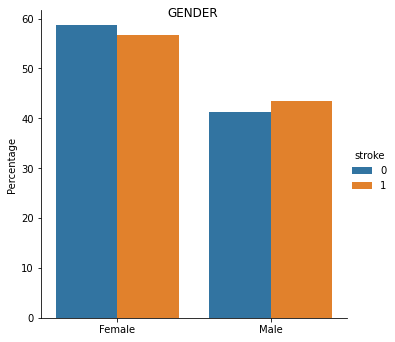

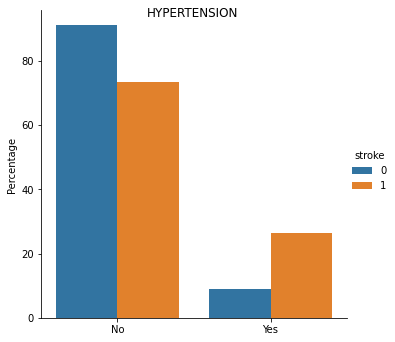

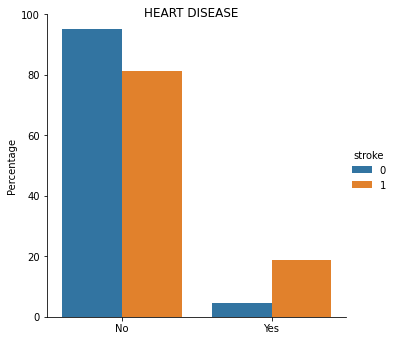

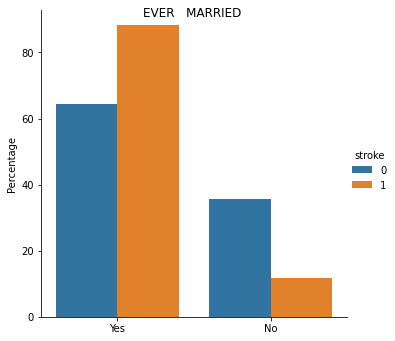

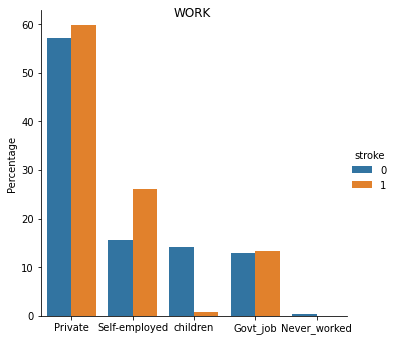

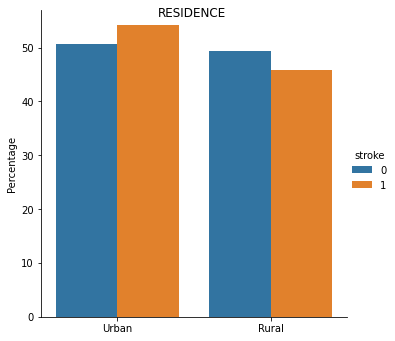

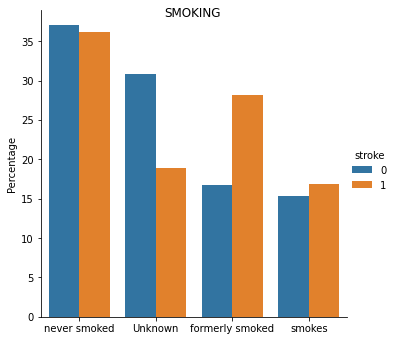

In [ ]:
categ_data_titles = ['GENDER', 'HYPERTENSION', 'HEART DISEASE', 'EVER   MARRIED', 'WORK', 'RESIDENCE', 'SMOKING']
i = 0

for features in categ_features:
  x,y = 'stroke', features

  if features == 'hypertension' or features == 'heart_disease':
    (stroke_data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Percent').
    reset_index().pipe((sns.catplot,'data'), x=y,y='Percent', hue=x, height=5, kind='bar', 
                        aspect=1).set_axis_labels("", "Percentage").set_xticklabels(["No", "Yes"]).fig.suptitle(categ_data_titles[i]))
  else:
    (stroke_data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Percent').
    reset_index().pipe((sns.catplot,'data'), x=y,y='Percent', hue=x, height=5, kind='bar', 
                        aspect=1).set_axis_labels("", "Percentage").fig.suptitle(categ_data_titles[i]))
  i+=1

## **Conclusion**

**CONCLUSION NUMERIC VARIABLES**: The age is a really important feature. The older one get, the more chances of having an stroke are.

**CONCLUSION CATEGORIC VARIABLES**: 

#Models

In [ ]:
class Visual:

  colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
  colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
  #ax1 = fig.add_subplot(gs[1, :])

  def __init__(self, y_test, prediction, c_matrix):
    self.y_test = y_test
    self.prediction = prediction
    self.c_matrix = c_matrix

  def class_report(self):
    print(classification_report(self.y_test, self.prediction))
  
  def conf_matrix(self, titulo):
    fig = plt.figure(figsize=(10,14))
    gs = fig.add_gridspec(4, 2)
    gs.update(wspace=0.1, hspace=0.8)
    ax0 = fig.add_subplot(gs[0, :])
    sns.heatmap(self.c_matrix, cmap=colormap, annot=True,fmt="d", linewidths=5,cbar=False, ax=ax0,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],xticklabels=['Predicted Non-Stroke','Predicted Stroke'],annot_kws={"fontsize":12})
    ax0.text(0,-0.25,titulo,fontsize=18,fontweight='bold')

In [ ]:
class Model:

  def __init__(self, model, split_dataset, layers=3, neurons=[12, 8, 1],
               activation=['relu', 'sigmoid'], 
               compile=['binary_crossentropy', 'adam', ['accuracy']], 
               epochs=50, batch_size=None, validation_data=None):
    self.model = model
    self.train_set = split_dataset[0]
    self.test_set = split_dataset[1]
    #Crear una condición: Si existe un tercer elemnto en la lista, entonces val_set
    self.layers = layers
    self.neurons = neurons
    self.activation = activation
    self.compile = compile
    self.epochs = epochs
    self.batch_size = batch_size
    self.validation_data = validation_data


  def Logistic_Regression(self):
    self.model.fit(self.train_set[0], self.train_set[1])
    prediction = self.model.predict(self.test_set[0])
    c_matrix = confusion_matrix(self.test_set[1], prediction)
    F1 = f1_score(self.test_set[1], prediction)
    self.prediction, self.c_matrix, self.F1 = prediction, c_matrix, F1

  def Random_Forest(self):
    self.model.fit(self.train_set[0], self.train_set[1])
    prediction = self.model.predict(self.test_set[0])
    c_matrix = confusion_matrix(self.test_set[1], prediction)
    F1 = f1_score(self.test_set[1], prediction)
    self.prediction, self.c_matrix, self.F1 = prediction, c_matrix, F1

  def Neural_Network(self):
    for layer in range(0,self.layers):
      if layer == 0:
        self.model.add(Dense(self.neurons[0], input_shape=(10,), activation=self.activation[0]))
      elif layer == self.layers-1:
        self.model.add(Dense(self.neurons[layer], activation=self.activation[1]))
      else:
        self.model.add(Dense(self.neurons[layer], activation=self.activation[0]))
    self.model.compile(loss=self.compile[0], optimizer=self.compile[1], metrics=self.compile[2])
    self.model.fit(self.train_set[0], self.train_set[1], validation_data=self.validation_data, epochs=self.epochs, batch_size=self.batch_size)
    _, self.accuracy = self.model.evaluate(self.train_set[0], self.train_set[1])
    prediction = (self.model.predict(self.test_set[0]) > 0.5).astype(int)
    c_matrix = confusion_matrix(self.test_set[1], prediction)
    F1 = f1_score(self.test_set[1], prediction)
    self.prediction, self.c_matrix, self.F1 = prediction, c_matrix, F1

# Data Preprocess

In [ ]:
stroke_data_copy = stroke_data.copy()

X = stroke_data_copy.drop('stroke', axis = 1)
y = stroke_data_copy['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Categorical Encoding

Before creating my models I still have to prepare the dataset. First of all, I have to label the categorical variables with numbers. As this [link says](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd), I have to choose what to do. So I first started with Label Encoding.

Later I will try some OneHotEncoder.

In [ ]:
stroke_data['gender'] = stroke_data['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)
stroke_data['Residence_type'] = stroke_data['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
stroke_data['ever_married'] = stroke_data['ever_married'].replace({'No':0,'Yes':1}).astype(np.uint8)
stroke_data['work_type'] = stroke_data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace({'Unknown':0,'formerly smoked':1,'smokes':2,'never smoked':3}).astype(np.uint8)

stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.600000,1,1
1,1,61.0,0,0,1,1,0,202.21,28.893237,3,1
2,0,80.0,0,1,1,0,0,105.92,32.500000,3,1
3,1,49.0,0,0,1,0,1,171.23,34.400000,2,1
4,1,79.0,1,0,1,1,0,174.12,24.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,80.0,1,0,1,0,1,83.75,28.893237,3,0
5105,1,81.0,0,0,1,1,1,125.20,40.000000,3,0
5106,1,35.0,0,0,1,1,0,82.99,30.600000,3,0
5107,0,51.0,0,0,1,0,0,166.29,25.600000,1,0


## Imbalanced Data - Machine Learning (Logistic Regression and Random Forest Classifier)

I have found I could use two methods SMOTE and Near-Missing, both described in this [links](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/#:~:text=SMOTE%20(synthetic%20minority%20oversampling%20technique)%20is%20one%20of%20the%20most,instances%20between%20existing%20minority%20instances.)

### Pre-observation

------------LOGISTIC REGRESSION------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       1.00      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533

------------RANDOM FOREST CLASSIFIER------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



<function matplotlib.pyplot.show(*args, **kw)>

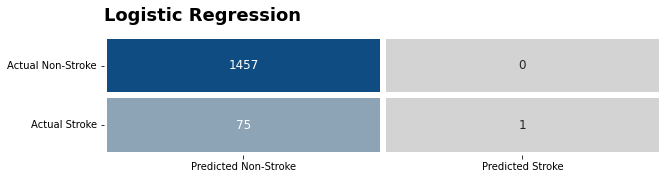

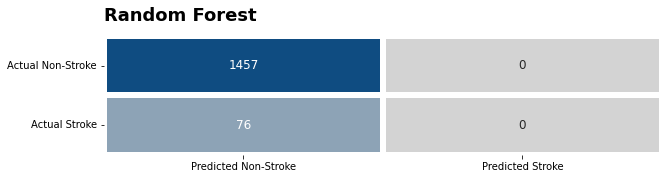

In [ ]:
split_data = [[X_train, y_train], [X_test, y_test]]

LR = Model(LogisticRegression(), split_data)
LR.Logistic_Regression()

RF = Model(RandomForestClassifier(), split_data)
RF.Random_Forest()

print("------------LOGISTIC REGRESSION------------")
LR_visual = Visual(LR.test_set[1], LR.prediction, LR.c_matrix)
LR_visual.class_report()
LR_visual.conf_matrix('Logistic Regression')

plt.show

print("------------RANDOM FOREST CLASSIFIER------------")
RF_visual = Visual(RF.test_set[1], RF.prediction, RF.c_matrix)
RF_visual.class_report()
RF_visual.conf_matrix('Random Forest')

plt.show

As we can see, if I try to cassify the current data with Logistic Regression and Random Forest Classifier model, I will get poor results. This is that both models tend to classify the majority of the dataset which is "Non-Stroke".

This means, I have to balance the dataset.

### SMOTE

------------LOGISTIC REGRESSION - SMOTE------------
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1457
           1       0.13      0.59      0.22        76

    accuracy                           0.79      1533
   macro avg       0.55      0.70      0.55      1533
weighted avg       0.93      0.79      0.85      1533

------------RANDOM FOREST CLASSIFIER - SMOTE------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1457
           1       0.12      0.24      0.16        76

    accuracy                           0.87      1533
   macro avg       0.54      0.57      0.54      1533
weighted avg       0.92      0.87      0.89      1533



<function matplotlib.pyplot.show(*args, **kw)>

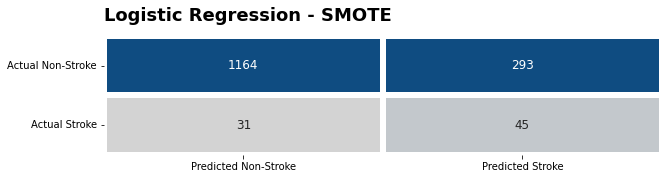

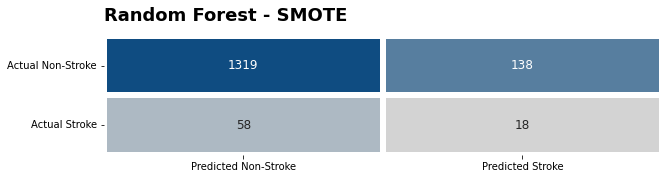

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=10)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

split_data = [[X_train_sm, y_train_sm], [X_test, y_test]]

LR_SM = Model(LogisticRegression(), split_data)
LR_SM.Logistic_Regression()

RF_SM = Model(RandomForestClassifier(), split_data)
RF_SM.Random_Forest()

print("------------LOGISTIC REGRESSION - SMOTE------------")
LR_vis_SM = Visual(LR_SM.test_set[1], LR_SM.prediction, LR_SM.c_matrix)
LR_vis_SM.class_report()
LR_vis_SM.conf_matrix('Logistic Regression - SMOTE')

plt.show

print("------------RANDOM FOREST CLASSIFIER - SMOTE------------")
RF_vi_SM = Visual(RF_SM.test_set[1], RF_SM.prediction, RF_SM.c_matrix)
RF_vi_SM.class_report()
RF_vi_SM.conf_matrix('Random Forest - SMOTE')

plt.show

### Near-Miss

------------LOGISTIC REGRESSION - NearMiss------------
              precision    recall  f1-score   support

           0       0.91      0.17      0.28      1457
           1       0.04      0.68      0.08        76

    accuracy                           0.19      1533
   macro avg       0.48      0.43      0.18      1533
weighted avg       0.87      0.19      0.27      1533

------------RANDOM FOREST CLASSIFIER - NearMiss------------
              precision    recall  f1-score   support

           0       0.91      0.14      0.24      1457
           1       0.04      0.74      0.08        76

    accuracy                           0.17      1533
   macro avg       0.48      0.44      0.16      1533
weighted avg       0.87      0.17      0.23      1533



<function matplotlib.pyplot.show(*args, **kw)>

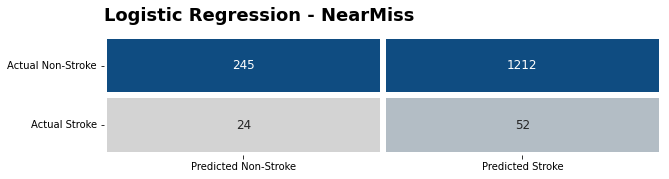

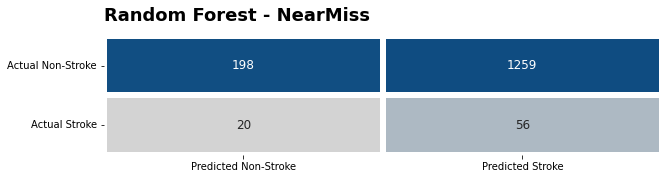

In [ ]:
nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train.ravel())

split_data = [[X_train_nm, y_train_nm], [X_test, y_test]]

LR_NM = Model(LogisticRegression(), split_data)
LR_NM.Logistic_Regression()

RF_NM = Model(RandomForestClassifier(), split_data)
RF_NM.Random_Forest()

print("------------LOGISTIC REGRESSION - NearMiss------------")
LR_vis_NM = Visual(LR_NM.test_set[1], LR_NM.prediction, LR_NM.c_matrix)
LR_vis_NM.class_report()
LR_vis_NM.conf_matrix('Logistic Regression - NearMiss')

plt.show

print("------------RANDOM FOREST CLASSIFIER - NearMiss------------")
RF_vi_NM = Visual(RF_NM.test_set[1], RF_NM.prediction, RF_NM.c_matrix)
RF_vi_NM.class_report()
RF_vi_NM.conf_matrix('Random Forest - NearMiss')

plt.show

### **Conclusion**

It seems to be, that **SMOTE** with parameters **random_state=42** and **k_neighbors=10** with the **Logistic Regression Model** of Machine Learning is the best option.

## Imbalanced Data - Deep Learning (Neural Network)

### Pre-observation

Epoch 1/10
112/112 [==============================] - 1s 3ms/step - loss: 0.2346 - accuracy: 0.9516
Epoch 2/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9513
Epoch 3/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9508
Epoch 4/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9505
Epoch 5/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9508
Epoch 6/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9513
Epoch 7/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9505
Epoch 8/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9511
Epoch 9/10
112/112 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9511
Epoch 10/10
112/112 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9516

<function matplotlib.pyplot.show(*args, **kw)>

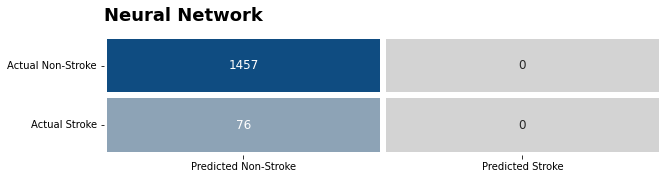

In [ ]:
split_data = [[X_train, y_train], [X_test, y_test]]

NN = Model(Sequential(), split_data, epochs=10)
NN.Neural_Network()

NN_visual = Visual(NN.test_set[1], NN.prediction, NN.c_matrix)
NN_visual.class_report()
NN_visual.conf_matrix('Neural Network')

plt.show

### SMOTE

Epoch 1/10
213/213 [==============================] - 1s 2ms/step - loss: 0.8134 - accuracy: 0.6904
Epoch 2/10
213/213 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7586
Epoch 3/10
213/213 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7708
Epoch 4/10
213/213 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7827
Epoch 5/10
213/213 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7962
Epoch 6/10
213/213 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8043
Epoch 7/10
213/213 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8106
Epoch 8/10
213/213 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8153
Epoch 9/10
213/213 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8185
Epoch 10/10
213/213 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8235

<function matplotlib.pyplot.show(*args, **kw)>

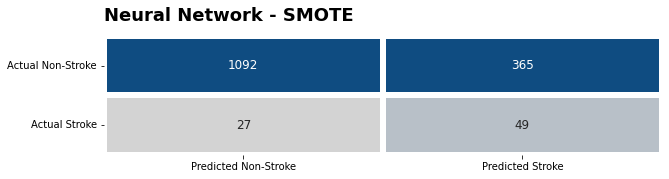

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=10)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

split_data = [[X_train_sm, y_train_sm], [X_test, y_test]]

NN_SM = Model(Sequential(), split_data, epochs=10)
NN_SM.Neural_Network()

NN_vis_SM = Visual(NN_SM.test_set[1], NN_SM.prediction, NN_SM.c_matrix)
NN_vis_SM.class_report()
NN_vis_SM.conf_matrix('Neural Network - SMOTE')

plt.show

### Near-Miss

Epoch 1/10
11/11 [==============================] - 1s 2ms/step - loss: 1.1647 - accuracy: 0.5636
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 0.9523 - accuracy: 0.5867
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.8466 - accuracy: 0.6098
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.7832 - accuracy: 0.6156
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.7399 - accuracy: 0.6040
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.6098
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6185
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6214
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6243
Epoch 10/10
11/11 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6156
              preci

<function matplotlib.pyplot.show(*args, **kw)>

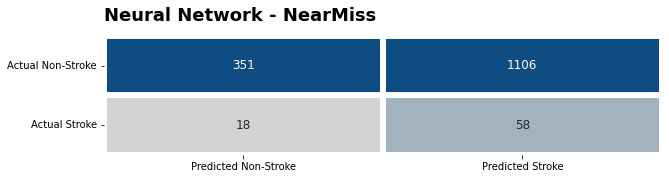

In [ ]:
nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train.ravel())

split_data = [[X_train_nm, y_train_nm], [X_test, y_test]]

NN_NM = Model(Sequential(), split_data, epochs=10)
NN_NM.Neural_Network()

NN_vis_NM = Visual(NN_NM.test_set[1], NN_NM.prediction, NN_NM.c_matrix)
NN_vis_NM.class_report()
NN_vis_NM.conf_matrix('Neural Network - NearMiss')

plt.show

### **Conclusion**

It seems to be, that **SMOTE** with parameters **random_state=42** and **k_neighbors=12** with the **Deep Neural Network** of Deep Learning is the best option.

## Model Selection and Conclusion

The Models listed below in this preprocessing step are the ones with the best perfomance till now:
- **Logistic Regression**: **SMOTE** with parameters **random_state=42** and **k_neighbors=10**.
- **Deep Neural Network**: **SMOTE** with parameters **random_state=42** and **k_neighbors=12**.

------------LOGISTIC REGRESSION - SMOTE------------
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1457
           1       0.13      0.59      0.22        76

    accuracy                           0.79      1533
   macro avg       0.55      0.70      0.55      1533
weighted avg       0.93      0.79      0.85      1533

------------NEURAL NETWORK - SMOTE------------
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1457
           1       0.12      0.64      0.20        76

    accuracy                           0.74      1533
   macro avg       0.55      0.70      0.52      1533
weighted avg       0.93      0.74      0.82      1533



<function matplotlib.pyplot.show(*args, **kw)>

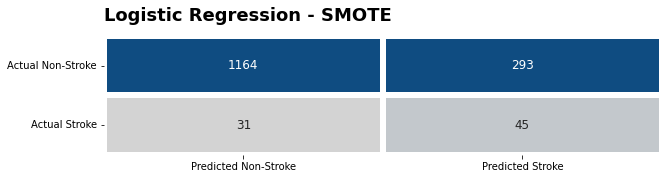

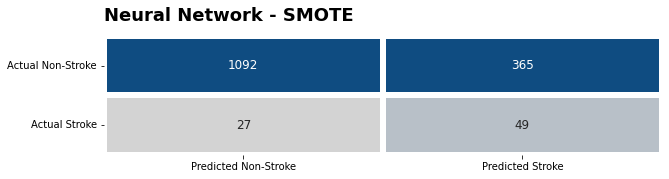

In [ ]:
print("------------LOGISTIC REGRESSION - SMOTE------------")
LR_vis_SM = Visual(LR_SM.test_set[1], LR_SM.prediction, LR_SM.c_matrix)
LR_vis_SM.class_report()
LR_vis_SM.conf_matrix('Logistic Regression - SMOTE')

print("------------NEURAL NETWORK - SMOTE------------")
NN_vis_SM = Visual(NN_SM.test_set[1], NN_SM.prediction, NN_SM.c_matrix)
NN_vis_SM.class_report()
NN_vis_SM.conf_matrix('Neural Network - SMOTE')

plt.show

# Validation Set and Hyperparameters Tunning

However, for Deep Learning, I can keep improving the model of Neural Network by tunning the hyperparameters and using a validation set, which I am gonna take from the test set.

In [174]:
stroke_data_copy = stroke_data.copy()

X = stroke_data_copy.drop('stroke', axis = 1)
y = stroke_data_copy['stroke']

X_train, X_comb, y_train, y_comb = train_test_split(X, y, test_size = 0.4, random_state = 0)

X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

sm = SMOTE(random_state=42, k_neighbors=10)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

sm = SMOTE(random_state=42, k_neighbors=10)
X_valid, y_valid = sm.fit_resample(X_valid, y_valid.ravel())

Epoch 1/50
183/183 [==============================] - 1s 5ms/step - loss: 0.8560 - accuracy: 0.5264 - val_loss: 0.5413 - val_accuracy: 0.7506
Epoch 2/50
183/183 [==============================] - 1s 4ms/step - loss: 0.5540 - accuracy: 0.7152 - val_loss: 0.4881 - val_accuracy: 0.7640
Epoch 3/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4818 - accuracy: 0.7700 - val_loss: 0.4431 - val_accuracy: 0.7923
Epoch 4/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.7784 - val_loss: 0.4865 - val_accuracy: 0.7767
Epoch 5/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.7971 - val_loss: 0.4488 - val_accuracy: 0.7654
Epoch 6/50
183/183 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8031 - val_loss: 0.4083 - val_accuracy: 0.8232
Epoch 7/50
183/183 [==============================] - 1s 5ms/step - loss: 0.4232 - accuracy: 0.8047 - val_loss: 0.4011 - val_accuracy: 0.8208
Epoch 

<function matplotlib.pyplot.show(*args, **kw)>

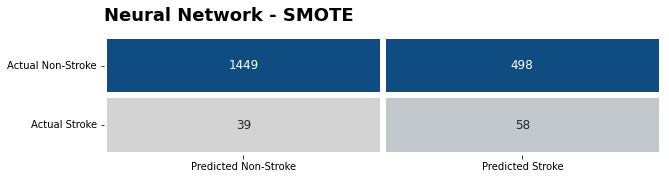

In [187]:
split_data = [[X_train_sm, y_train_sm], [X_test, y_test]]

opt = keras.optimizers.Adam(learning_rate=0.01)

NN_SM = Model(Sequential(), split_data, epochs=50, layers=5, neurons=[32, 12, 8, 4, 1], validation_data=(X_valid,y_valid), 
              compile=['binary_crossentropy', opt, ['accuracy']])

NN_SM.Neural_Network()

NN_vis_SM = Visual(NN_SM.test_set[1], NN_SM.prediction, NN_SM.c_matrix)
NN_vis_SM.class_report()
NN_vis_SM.conf_matrix('Neural Network - SMOTE')

plt.show